# Анализ бизнес показателей

## Описание проекта

Вы — маркетинговый аналитик развлекательного приложения `Procrastinate Pro+`. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с `1 мая` по `27 октября 2019 года`:
* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

Вам предстоит изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

## Описание данных

В вашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

Структура `visits_info_short.csv`:
* `User Id` — уникальный идентификатор пользователя,
* `Region` — страна пользователя,
* `Device` — тип устройства пользователя,
* `Channel` — идентификатор источника перехода,
* `Session Start` — дата и время начала сессии,
* `Session End` — дата и время окончания сессии.

Структура `orders_info_short.csv`:
* `User Id` — уникальный идентификатор пользователя,
* `Event Dt` — дата и время покупки,
* `Revenue` — сумма заказа.

Структура `costs_info_short.csv`:
* `dt` — дата проведения рекламной кампании,
* `Channel` — идентификатор рекламного источника,
* `costs` — расходы на эту кампанию.

## Импорт библиотек и настроек

In [1]:
import pandas as pd
import os
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

## Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [2]:
try:
    os.path.exists('/datasets/visits_info_short.csv')
    visits_raw = pd.read_csv('/datasets/visits_info_short.csv')
    os.path.exists('/datasets/orders_info_short.csv')
    orders_raw = pd.read_csv('/datasets/orders_info_short.csv')
    os.path.exists('/datasets/costs_info_short.csv')
    costs_raw = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits_raw = pd.read_csv('datasets/visits_info_short.csv')
    orders_raw = pd.read_csv('datasets/orders_info_short.csv')
    costs_raw = pd.read_csv('datasets/costs_info_short.csv')
visits = visits_raw.copy()
orders = orders_raw.copy()
costs = costs_raw.copy()


## Знакомство с данными

In [3]:
#Напишем функцию, чтобы быстро познакомиться с данными:
def df_first_glance(df):
    print('Пять рандомных строк:')
    display(df.sample(5))
    print('\n\n\n')
    print('Информация по датафрейму: \n')
    display(df.info())
    print('\n\n\n')
    print('Подсчет пропусков:')
    display(df.isna().sum())
    print('\n\n\n')
    print('Подсчет дубликатов:')
    display('Колличество очевидных дубликатов равно {:}'.format(df.duplicated().sum()))
    print('\n\n\n')
    print('Посмотрим статистику по столбцам с числовым типом данных:')
    display(df.describe())

In [4]:
df_first_glance(df = visits)

Пять рандомных строк:


,User Id,Region,Device,Channel,Session Start,Session End
161142,548058910108,United States,iPhone,organic,2019-09-27 12:37:06,2019-09-27 13:04:59
273803,467192507561,Germany,PC,LeapBob,2019-09-03 01:32:54,2019-09-03 02:00:39
257553,225838370263,France,Android,OppleCreativeMedia,2019-08-08 15:42:38,2019-08-08 15:49:40
293877,197641319011,France,iPhone,WahooNetBanner,2019-10-05 23:27:07,2019-10-05 23:47:10
68068,667153668668,United States,iPhone,organic,2019-07-07 23:20:27,2019-07-07 23:20:36






Информация по датафрейму: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None





Подсчет пропусков:


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64





Подсчет дубликатов:


'Колличество очевидных дубликатов равно 0'





Посмотрим статистику по столбцам с числовым типом данных:


,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


In [5]:
df_first_glance(df = orders)

Пять рандомных строк:


,User Id,Event Dt,Revenue
30007,683495082445,2019-06-26 00:00:41,4.99
14142,28359920593,2019-08-24 05:08:46,4.99
17401,761697570926,2019-09-11 06:52:05,4.99
17561,287035741653,2019-09-12 13:25:17,4.99
20191,75514331188,2019-09-26 15:27:51,4.99






Информация по датафрейму: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None





Подсчет пропусков:


User Id     0
Event Dt    0
Revenue     0
dtype: int64





Подсчет дубликатов:


'Колличество очевидных дубликатов равно 0'





Посмотрим статистику по столбцам с числовым типом данных:


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


In [6]:
df_first_glance(df = costs)

Пять рандомных строк:


,dt,Channel,costs
681,2019-09-19,TipTop,399.00
326,2019-09-24,MediaTornado,6.72
1195,2019-08-24,LeapBob,14.70
1458,2019-05-19,WahooNetBanner,15.00
1302,2019-06-12,OppleCreativeMedia,8.00






Информация по датафрейму: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None





Подсчет пропусков:


dt         0
Channel    0
costs      0
dtype: int64





Подсчет дубликатов:


'Колличество очевидных дубликатов равно 0'





Посмотрим статистику по столбцам с числовым типом данных:


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


Подведем итоги знакомства с данными. Очевидных дубликатов нет, пропусков нет, из проблем можно выделить, что:
* у столбцов, связанных со времени, стоит неправильный тип данных 
* у названий некоторых столбцов отсутствует змеиный регистр

Исправим это:

In [7]:
#переименовываем столбцы

dataframes = [costs, orders, visits]
#for dataframe in dataframes:
#    dataframe.columns = dataframe.columns.str.lower()
#    dataframe.rename(columns=lambda s: s.replace(' ', '_'), inplace=True)
    

In [8]:
#меняем тип данных
#costs['dt'] = pd.to_datetime(costs['dt'])
#orders['event_dt'] = pd.to_datetime(orders['event_dt'])
#visits['session_end'] = pd.to_datetime(visits['session_end'])
#visits['session_start'] = pd.to_datetime(visits['session_start'])

In [9]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [10]:
#переименовываем столбцы
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]


#меняем тип данных
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [ ]:
#проверим
for dataframe in dataframes:
    dataframe.info()
    print('\n\n\n')
    

У меня функция `get_profiles` писала ошибку `You are trying to merge on datetime64[ns] and object columns. If you wish to proceed you should use pd.concat`, в пачке преподаватель посоветовал вот как выше сделать, но `costs['dt']` все равно тип `object`, я после получения профилей поменяю тип данных

## Задайте функции для расчёта и анализа `LTV`, `ROI`, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [12]:
     
def get_profiles(visits, orders, costs):
 
    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
 
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
 
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
 
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
 
    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
 
    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']
 
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
 
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
 
    return profiles

In [13]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [14]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [15]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [16]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [17]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [19]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### Составляем профили пользователей и определим даты привлечения пользоватей

In [20]:
# профили
profiles = get_profiles(visits, orders, costs)
profiles.head()


,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [21]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


In [22]:
# даты 
profiles['dt'] = pd.to_datetime(profiles['dt'])
min_date = profiles['dt'].min()
max_date = profiles['dt'].max()
min_date, max_date

(Timestamp('2019-05-01 00:00:00'), Timestamp('2019-10-27 00:00:00'))

#### Вывод
С помощью функции `get_profiles` получили данные о профилях пользователей, а также определили минимальную и максимальную дату привлечения профилей(минимальная - `2019-05-01`, максимальная - `2019-10-27`)

### Определим из каких стран приходят пользователи и на какую страну приходится больше всего платящих пользователей

In [23]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [24]:
#regions_users = profiles.groupby(['region']).agg({'user_id':'nunique'}).reset_index()
#regions_users = regions_users.rename(columns={'user_id':'users_count'})

#regions_payers = profiles[profiles['payer'] == True].groupby('region').agg({'user_id':'nunique'}).reset_index()
#regions_payers = regions_payers.rename(columns={'user_id':'payers_count'})

In [25]:
#regions_ratio = regions_users.merge(regions_payers, on='region')
#regions_ratio['payers_ratio'] = (regions_ratio['payers_count'] / regions_ratio['users_count'])*100
#regions_ratio['device_ratio'] = (regions_ratio['users_count'] / sum(regions_ratio['users_count']))*100
#regions_ratio.sort_values('users_count', ascending=False)

In [26]:
# напишем функцию, чтобы 
def table(df, by):
    name_1 = df.groupby(by).agg({'user_id':'nunique'}).reset_index().rename(columns={'user_id':by+'_count'})
    name_2 = df[df['payer'] == True].groupby(by).agg({'user_id':'nunique'}).reset_index().rename(columns={'user_id':'payers_count'})
    name_3 = name_1.merge(name_2, on=by)
    name_3['payers_ratio'] = (name_3['payers_count'] / name_3[by+'_count'])*100
    name_3[by+'_ratio'] = (name_3[by+'_count'] / sum(name_3[by+'_count']))*100

    return name_3.sort_values(by+'_count', ascending=False)

In [27]:
table(df=profiles, by='region')

,region,region_count,payers_count,payers_ratio,region_ratio
3,United States,100002,6902,6.901862,66.664445
2,UK,17575,700,3.982930,11.716042
0,France,17450,663,3.799427,11.632713
1,Germany,14981,616,4.111875,9.986801


#### Вывод
Доля `США` занимает `2/3` от всего количества уникальных пользователей, наибольшая доля платящий пользователей приходится также на `США`, меньше всего уникальных пользователей в `Германии`, а наименьшая доля платящих пользователей приходится на `Францию`. 


### Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 
Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [28]:
#device_users = profiles.groupby('device').agg({'user_id':'nunique'}).reset_index().rename(columns={'user_id':'device_count'})

#device_payers = profiles[profiles['payer'] == True].groupby('device').agg({'user_id':'nunique'}).reset_index().rename(columns={'user_id':'payers_count'})

In [29]:
#device_ratio = device_users.merge(device_payers, on='device')
#device_ratio['payers_ratio'] = (device_ratio['payers_count'] / device_ratio['device_count'])*100
#device_ratio['device_ratio'] = (device_ratio['device_count'] / sum(device_ratio['device_count']))*100
#device_ratio.sort_values('device_count', ascending=False)


In [30]:
table(df=profiles, by='device')

,device,device_count,payers_count,payers_ratio,device_ratio
3,iPhone,54479,3382,6.207897,36.317396
0,Android,35032,2050,5.851793,23.353421
2,PC,30455,1537,5.046790,20.302251
1,Mac,30042,1912,6.364423,20.026932


#### Вывод
Среди всей выборки пользователи пользуются 4 видами девайсов, причем их можно поделить на мобильные и компьютеры. На компьютеры приходится `~40%`, а на мобильные `~60%`. Наибольшая доля пользователей у пользователей `iPhone` - `36.3%`, остальные девайсы практически равномерно распределены среди оставшейся выборки. 

Доля платящих пользователей выше всего у пользователей `Mac` - `6.4%`, следом идут пользователи `iPhone` - `6.2%`, потом `Android` и `PC` - `5.9%` и `5%` соответственно.

### Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. 
Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [31]:
table(df=profiles, by='channel')

,channel,channel_count,payers_count,payers_ratio,channel_ratio
10,organic,56439,1160,2.055316,37.623993
1,FaceBoom,29144,3557,12.204914,19.428297
6,TipTop,19561,1878,9.600736,13.039971
4,OppleCreativeMedia,8605,233,2.707728,5.736361
2,LeapBob,8553,262,3.063253,5.701696
7,WahooNetBanner,8553,453,5.296387,5.701696
5,RocketSuperAds,4448,352,7.913669,2.965175
3,MediaTornado,4364,156,3.574702,2.909178
8,YRabbit,4312,165,3.826531,2.874513
0,AdNonSense,3880,440,11.340206,2.586529


#### Вывод
Наибольшая доля клиентов пришла из органического трафика - `37.6%`, также, довольно большая доля клиентов пришла из `FaceBoom` и `TipTop`, `12.2%` и `9.6%` соответственно, меньше всего клиентов пришли из `lambdaMediAds` - `1.43%`

Самая большая доля платящих пользователей пришла через `FaceBoom` - `12.2%`, на 2 месте `AdNonSense` - `11.34%`, на 3 месте `lambdaMediaAds` - `10.47`, примечательно, что второе и третье место по доли платящих пользователей занимает две последних строчки по привлеченным клиентам.

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### Посчитайем общую сумму расходов на маркетинг.

In [32]:
profiles['acquisition_cost'].sum()

105497.29999999999

#### Вывод
Всего на маркетинг было потрачено `105497.3`

### Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [33]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [34]:
channel_cost = profiles.groupby(['channel']).agg({'acquisition_cost':'sum'}).reset_index().sort_values(by='acquisition_cost', ascending=False)
channel_cost['ratio'] = (channel_cost['acquisition_cost'] / channel_cost['acquisition_cost'].sum())*100
channel_cost

,channel,acquisition_cost,ratio
6,TipTop,54751.30,51.898295
1,FaceBoom,32445.60,30.754910
7,WahooNetBanner,5151.00,4.882589
0,AdNonSense,3911.25,3.707441
4,OppleCreativeMedia,2151.25,2.039152
5,RocketSuperAds,1833.00,1.737485
2,LeapBob,1797.60,1.703930
9,lambdaMediaAds,1557.60,1.476436
3,MediaTornado,954.48,0.904744
8,YRabbit,944.22,0.895018


#### Вывод
Больше половины бюджета `51.9%` ушло на канал `TipTop`, на втором месте `FaceBoom` - `30.8%`, на все остальные каналы привлечения пользователей ушло меньше `20%` бюджета. Примечательно, что на каналы привлечения, на которых платящая доля пользователей занимает 2 и 3 место из таблицы выше, всего было потрачено `3.7%(AdNonSense)` и `1.5%(lambdaMediaAds)` от общего бюджета, соответственно.

### Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [35]:
profiles['week'] = profiles['dt'].dt.isocalendar().week
profiles['month'] = profiles['dt'].dt.month

In [36]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,week
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,5,True,1.088172,19
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,7,False,1.107237,28
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,10,False,0.000000,40
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,8,False,0.988235,34
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,10,False,0.230769,40


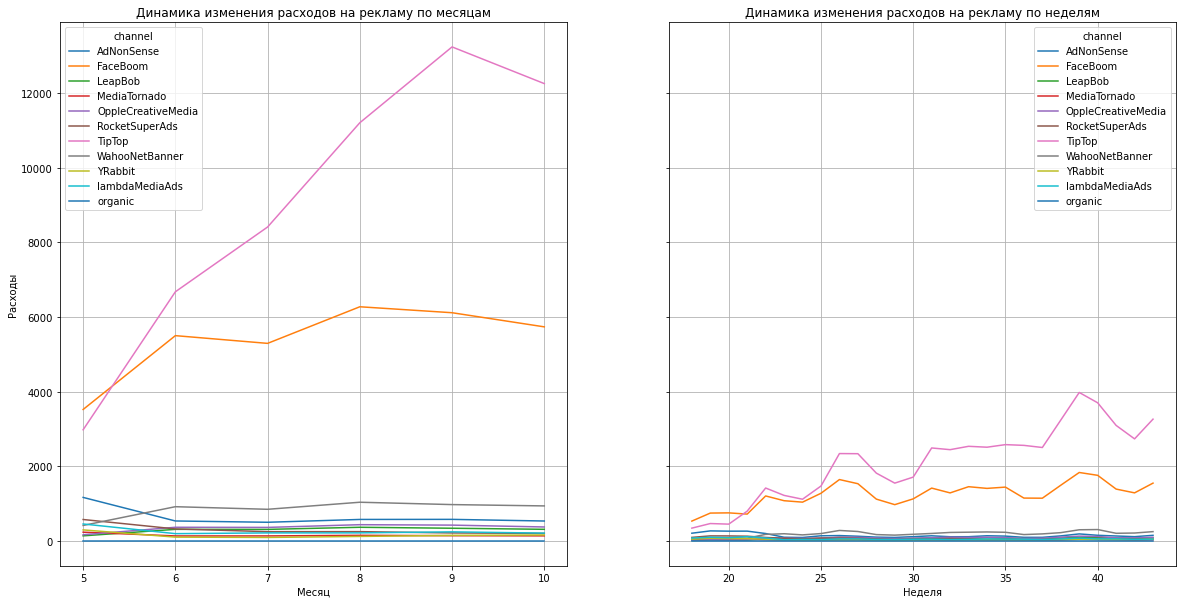

In [37]:
profiles_month = profiles.pivot_table(values='acquisition_cost',
                          index='month',
                          columns='channel',
                          aggfunc='sum'

                          ).plot(grid=True,
                                title='Динамика изменения расходов на рекламу по месяцам',
                                xlabel='Месяц',
                                ylabel='Расходы',
                                ax=plt.subplot(1,2,1),
                                figsize=(20,10))



profiles_week = profiles.pivot_table(values='acquisition_cost',
                          index='week',
                          columns='channel',
                          aggfunc='sum'

                          ).plot(grid=True,
                                title='Динамика изменения расходов на рекламу по неделям',
                                xlabel='Неделя',
                                ylabel='Расходы',
                                ax=plt.subplot(1,2,2, sharey=profiles_month),
                                figsize=(20,10))
                          

#### Вывод
По графику видно, что расходы на `TipTop` и `FaceBoom` менялись со временем, а расходы на остальные каналы привлечения почти не менялись.

### Узнайте, сколько в среднем стоило привлечение одного пользователя (`CAC`) из каждого источника. Используйте профили пользователей.

In [38]:
profiles.groupby(['channel']).agg({'acquisition_cost':'mean'}).reset_index().rename(columns={'acquisition_cost':'mean_acquisition_cost'}).sort_values(by='mean_acquisition_cost', ascending=False)

,channel,mean_acquisition_cost
6,TipTop,2.799003
1,FaceBoom,1.113286
0,AdNonSense,1.008054
9,lambdaMediaAds,0.724802
7,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
4,OppleCreativeMedia,0.250000
8,YRabbit,0.218975
3,MediaTornado,0.218717
2,LeapBob,0.210172


#### Вывод
Самым дорогим источником привлечения является `TipTop`, цена за одного пользователя `2.8`, следующий по дороговизне клиент из `FaceBoom` - `1.11`, у ранее отмеченных `AdNonSense` и `lamndaMediaAds` цена не сильно ниже, чем у `FaceBoom`. Самые дешевые пользователи у `YRabbit` - `0.22`, `MediaTornado` - `0.22`, `LeapBob` - `0.21`

## Оцените окупаемость рекламы

Используя графики `LTV`, `ROI` и `CAC`, проанализируйте окупаемость рекламы. Считайте, что на календаре `1 ноября 2019 года`, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через `две недели` после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики `LTV`, `CAC` и `ROI`.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики `LTV` и `ROI`, а также графики динамики `LTV`, `CAC` и `ROI`.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики `LTV` и `ROI`, а также графики динамики `LTV`, `CAC` и `ROI`.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики `LTV` и `ROI`, а также графики динамики `LTV`, `CAC` и `ROI`.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

Органический трафик не будем включать в анализ, так как бесплатные пользователи могут исказить данные, установим дату анализа и горизонт:

In [42]:
profiles_without_organic = profiles[profiles['channel'] != 'organic']
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

### Проанализируем окупаемость рекламы c помощью графиков `LTV` и `ROI`, а также графики динамики `LTV`, `CAC` и `ROI`.

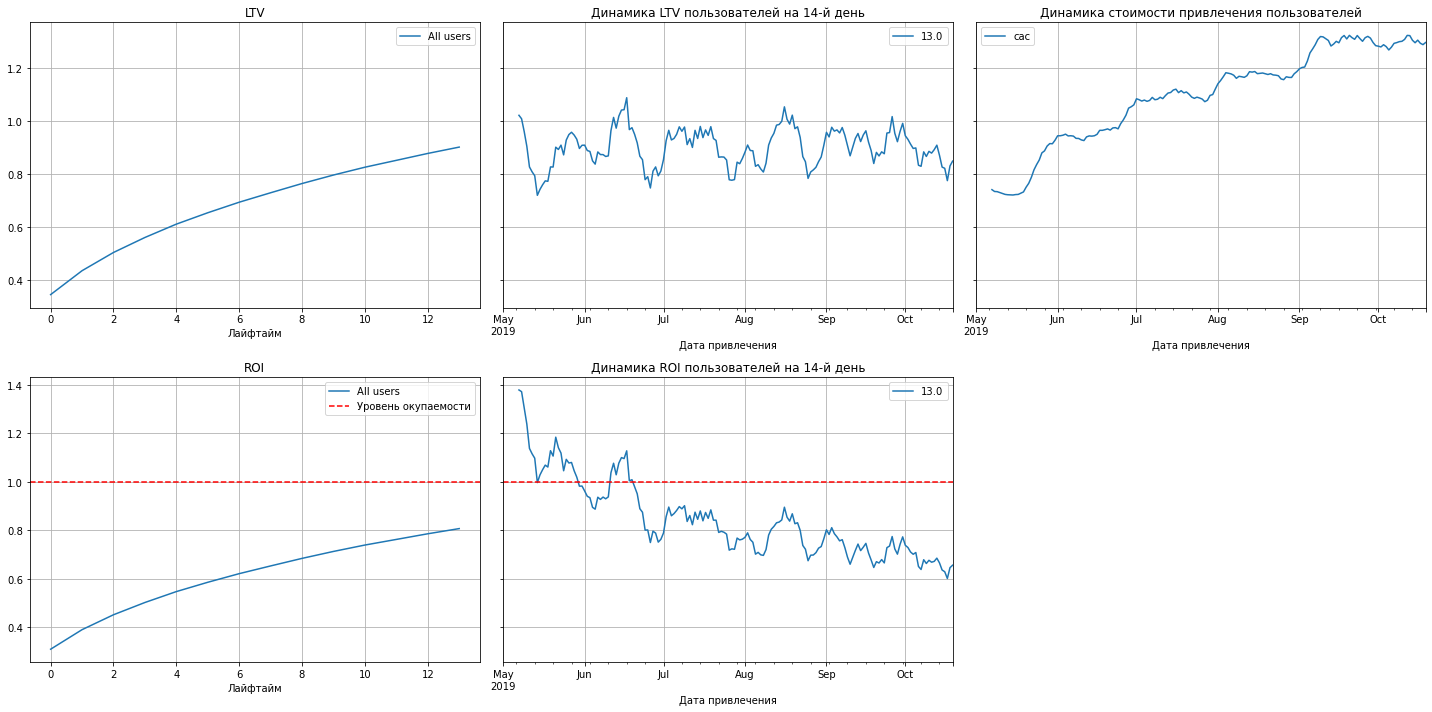

In [43]:
 # считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

#### Вывод
Кривая `LTV` растет, динамика `LTV` на 14 день держится примерно на одном уровне, `ROI` находится ниже окупаемого уровня, при этом динамика `ROI` на 14 день показывает, что пользователи окупали затраченную на них рекламу в период с мая до середины июня. Возможно, это связано с тем, что график динамики стоимости привлечения пользователей в этот же период начал расти.

### Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

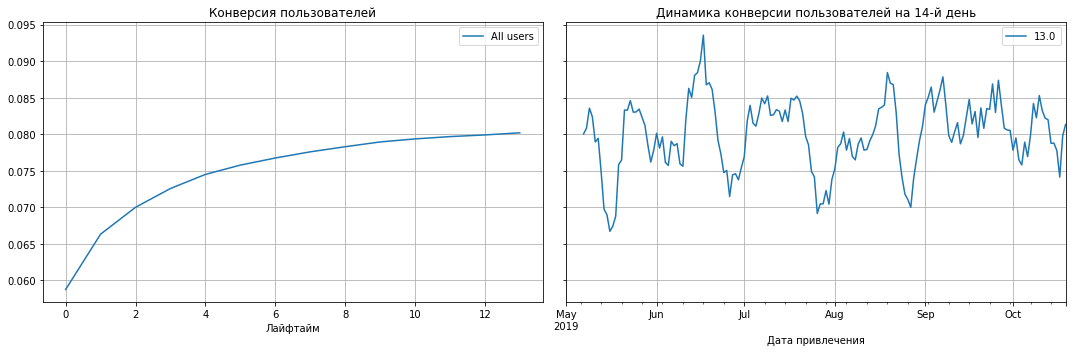

In [44]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_without_organic, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

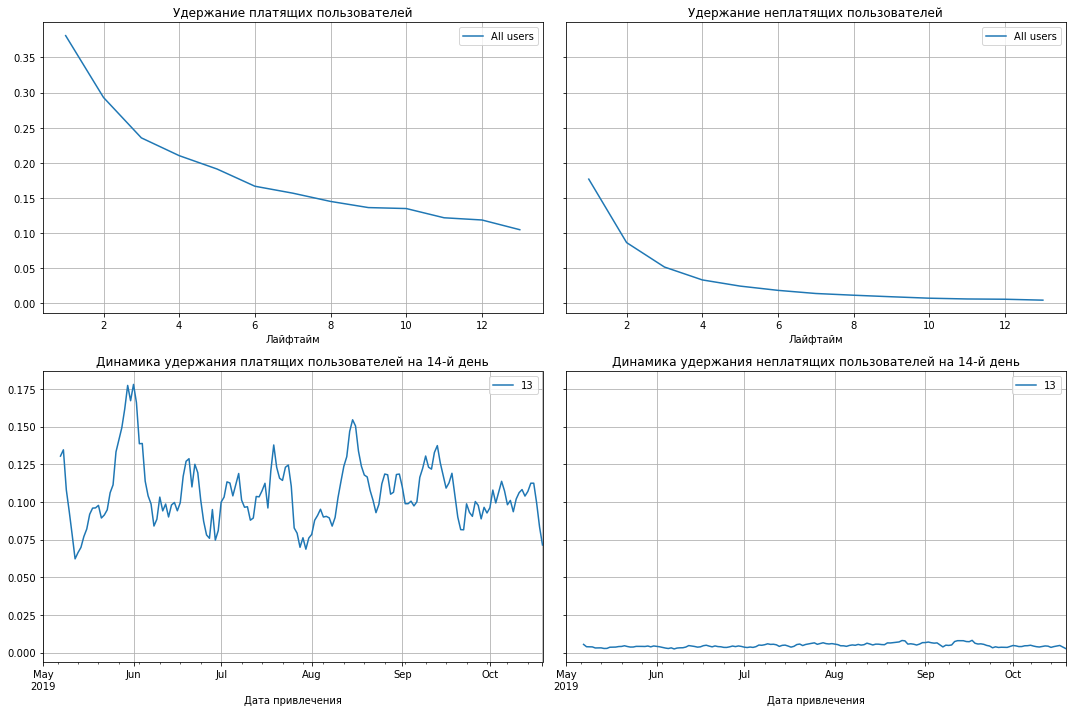

In [45]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_without_organic, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

#### Вывод
На вторую неделю рост конверсии замедляется, на 14 день конверсия пользователей чуть больше `8%`, а динамика конверсии скачет.
Удержание платящих пользователей выше, чем неплатящий, при этом, динамика удержания платящих скачет, а динамика удержания неплатящих пользователей более стабильна

### Проанализируем окупаемость рекламы с разбивкой по устройствам. Постройте графики `LTV` и `ROI`, а также графики динамики `LTV`, `CAC` и `ROI`.

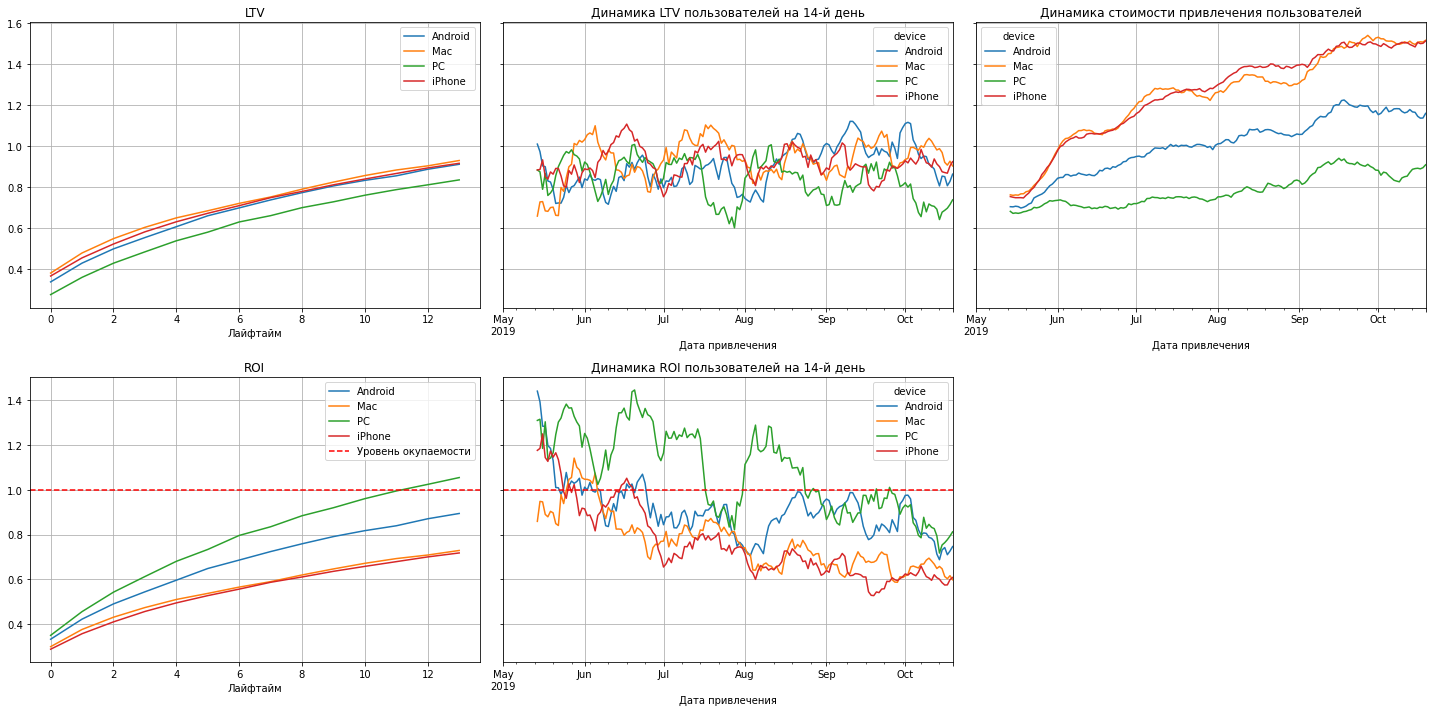

In [46]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### Вывод
Самый плохой показатель у кривой `LTV` у `PC`, остальные три вида девайсов держаться на примерно одинаковом уровне. График динамики `LTV` пользователей на 14 день нестабилен, `PC` также самый худший показатель. Интересно, что на графике кривой `ROI` только `PC` смог преодолеть уровень окупаемости. График динамики `ROI` пользователей на 14 день показывает, что пользователи `PC` вправду хорошо окупались, но пользователи, привлеченные в конце августа, и далее перестали окупаться, также, стоит заметить, что с мая по июнь привлеченные пользователи `Anroid` и `iPhone` тоже окупались, а вот пользователи `Mac`, можно сказать, окупались только в конце мая и начале июня.

### Проанализируем окупаемость рекламы с разбивкой по странам. Постройте графики `LTV` и `ROI`, а также графики динамики `LTV`, `CAC` и `ROI`.

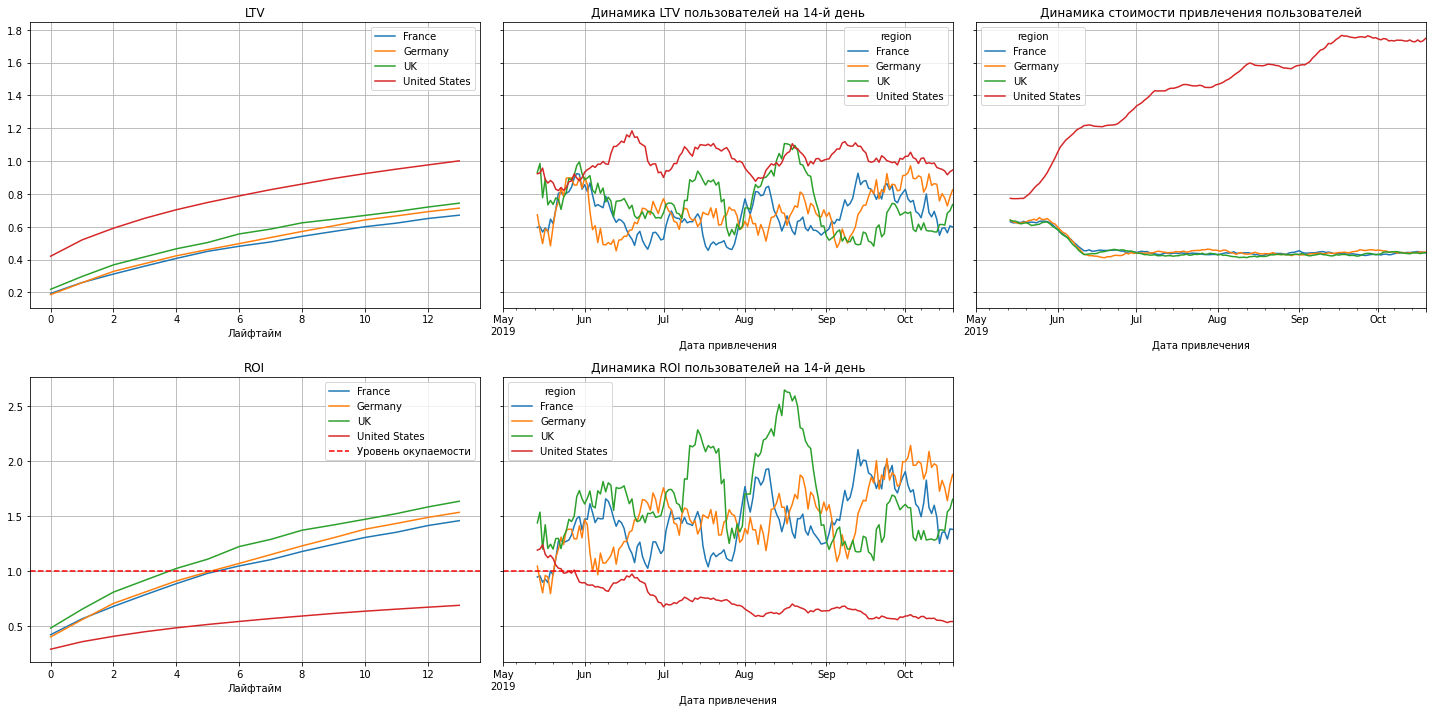

In [47]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### Вывод
Кривая `LTV` выше всего у `США`, остальные страны держатся примерно на одном уровне, динамика `LTV` это подтверждает, при этом, динамика `LTV` `США` более стабильная, но, кривая `ROI` показывает, что линию окупаемости преодолели все страны, кроме `США`. По графику `ROI` можно увидеть, что пользователи из `США` окупались привлеченные только в середине мая. Такую низкую окупаемость клиентов, привлеченных из `США`, можно объяснить графиком `САС`, на котором видно, что начиная с конца мая очень сильно увеличилась стоимость привлечения пользователя, когда в других странах, в это же время стоимость привлечения клиентов снизилась 

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики `LTV` и `ROI`, а также графики динамики `LTV`, `CAC` и `ROI`.

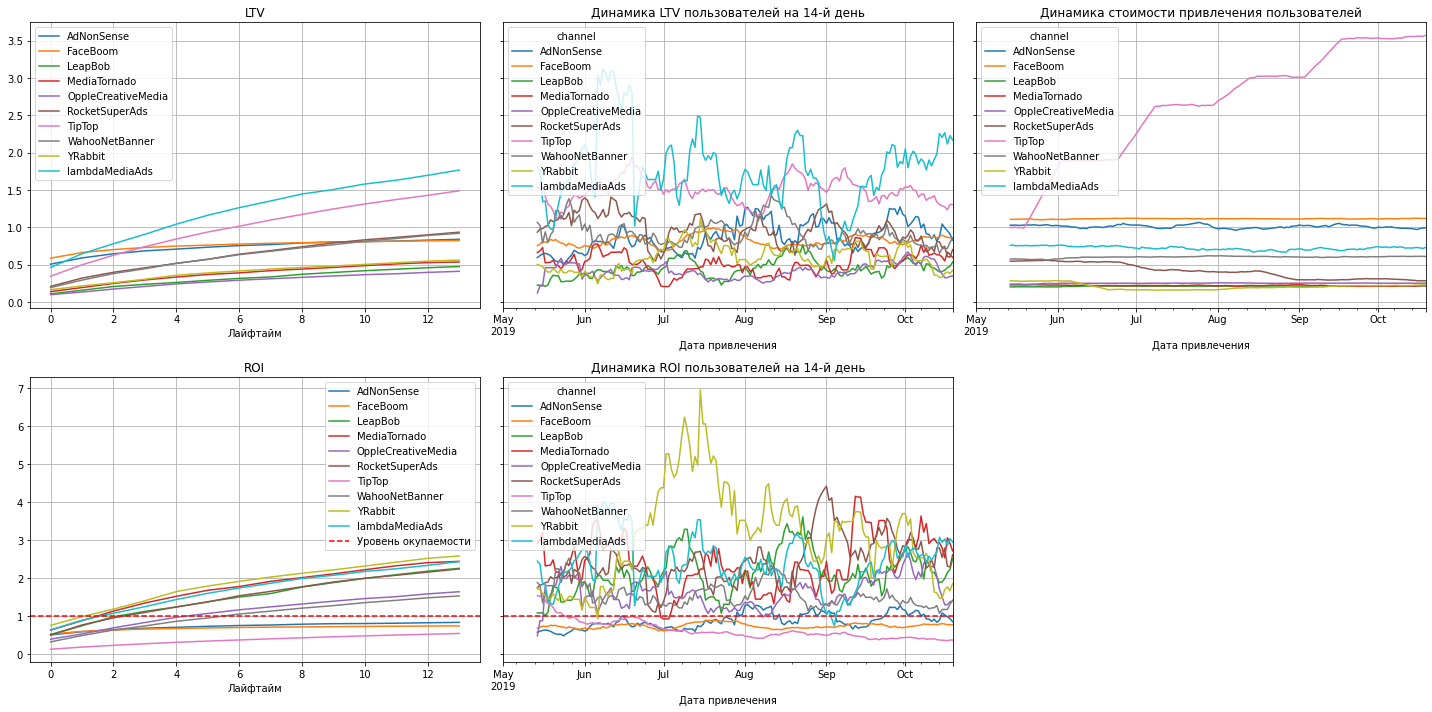

In [48]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_without_organic, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

#### Вывод
Самый высокий `LTV` показатель у `lambdaMediaAds` и `TipTop`, при этом динамика `LTV` пользователей на 14 день у `lambdaMediaAds` скачет, а у `TipTop` более стабильная

Кривая `ROI` показывает, что не окупились всего несколько каналов привлечения - `TipTop`, `FaceBoom`, `AdNonSense`

По графику динамики `ROI` пользователей на 14 день всплеск окупаемости с июля по август у пользователей, привлеченных из канала `YRabbit`

По графику динамики стоимости привлечения пользователей видно, что все вливания в каналы были примерно на одном уровне, кроме канала `TipTop`, при этом, если смотреть на каналы, пользователи которых не окупились, то клиенты `FaceBoom` вторые по дороговизне, а клиенты `AdNonSense` - третьи

###  Ответьте на такие вопросы:

####  Окупается ли реклама, направленная на привлечение пользователей в целом?
* В начале рекламной кампании реклама, направленная на привлечение пользователей, окупалась, а начиная с конца мая привлеченные пользователи перестали окупаться

#### Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
* Хуже всего окупались пользователи с устройствами `iPhone` или `Mac`, страна - `США`, каналы привлечения - `TipTop` и `FaceBoom`

#### Чем могут быть вызваны проблемы окупаемости?
* Проблемы с окупаемостью могли возникнуть из-за неправильно распределенного бюджета рекламной кампании в те источники, где, возможно, нет ЦА продукта

## Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

In [49]:
region_cost_1 = profiles.groupby(['region']).agg({'acquisition_cost':'sum'}).reset_index().sort_values(by='acquisition_cost', ascending=False)
region_cost_1['ratio'] = (region_cost_1['acquisition_cost'] / region_cost_1['acquisition_cost'].sum())*100
region_cost_1

,region,acquisition_cost,ratio
3,United States,90928.600000,86.190452
0,France,5075.973946,4.811473
2,UK,5068.502819,4.804391
1,Germany,4424.223235,4.193684


In [50]:
device_cost_1 = profiles.groupby(['device']).agg({'acquisition_cost':'sum'}).reset_index().sort_values(by='acquisition_cost', ascending=False)
device_cost_1['ratio'] = (device_cost_1['acquisition_cost'] / device_cost_1['acquisition_cost'].sum())*100
device_cost_1

,device,acquisition_cost,ratio
3,iPhone,43678.788251,41.402755
1,Mac,24094.537878,22.839009
0,Android,22460.629159,21.290241
2,PC,15263.344712,14.467996


### Причины неэффективности привлечения пользователей.
Начиная с мая и до середины июня рекламная кампания окупалась, при этом, примерно в этот же момент начали вливать больше денег в рекламу в канате `TipTip`. К тому же на канал привлечения пользователей `TipTip` было потрачено чуть больше половины бюджета. Второй канал, на который потратили `~30%` бюджета - `FaceBoom` тоже не окупился. 

Также, стоит принять во внимание, что рекламная кампания, по всей видимости, была направлена на рынок `США`, который не окупился. Пользователи `Mac` и `iPhone` тоже плохо окупаются

На фоне всего вышеперечисленного можно составить профиль экономически не выгодного пользователя - Страна - `USA`, устройство - `iPhone` или `Mac`, пользуется сервисами - `TipTop` и `FaceBoom`

По итогу мы имеет, что: 
* На два канала привлечения было потрачено `~80%` бюджета, и они оба не окупились(`FaceBoom`, `TipTop`)
* На рынок `США` было потрачено `86%`
* На пользователей `iPhone` и `Mac`, которые не окупились, было потрачено суммарно `~64%` бюджета
  
Резюмируя, можно сделать вывод, что основной причиной неэффективности привлечения пользователей является неправильное распределение денежных ресурсов в рамках рекламной кампании.


Посмотрим как распределялся бюджет по каналам и регионам, по каналм и девайсам:

In [51]:
channel_region_cost = profiles.groupby(['channel', 'region']).agg({'acquisition_cost':'sum'}).reset_index().sort_values(by='acquisition_cost', ascending=False)
channel_region_cost['ratio'] = (channel_region_cost['acquisition_cost'] / channel_region_cost['acquisition_cost'].sum())*100
channel_region_cost

,channel,region,acquisition_cost,ratio
12,TipTop,United States,54751.300000,51.898295
3,FaceBoom,United States,32445.600000,30.754910
11,RocketSuperAds,United States,1833.000000,1.737485
15,WahooNetBanner,UK,1808.890277,1.714632
13,WahooNetBanner,France,1789.137006,1.695908
14,WahooNetBanner,Germany,1552.972718,1.472050
0,AdNonSense,France,1376.316788,1.304599
2,AdNonSense,UK,1305.650668,1.237615
1,AdNonSense,Germany,1229.282545,1.165227
7,MediaTornado,United States,954.480000,0.904744


In [52]:
channel_device_cost = profiles.groupby(['channel', 'device']).agg({'acquisition_cost':'sum'}).reset_index().sort_values(by='acquisition_cost', ascending=False)
channel_device_cost['ratio'] = (channel_device_cost['acquisition_cost'] / channel_device_cost['acquisition_cost'].sum())*100
channel_device_cost

,channel,device,acquisition_cost,ratio
27,TipTop,iPhone,24657.546238,23.372680
7,FaceBoom,iPhone,14467.460781,13.713584
25,TipTop,Mac,13550.207414,12.844127
24,TipTop,Android,10862.074589,10.296069
5,FaceBoom,Mac,8088.075975,7.666619
4,FaceBoom,Android,6540.836409,6.200004
26,TipTop,PC,5681.471760,5.385419
6,FaceBoom,PC,3349.226836,3.174704
30,WahooNetBanner,PC,2052.616493,1.945658
2,AdNonSense,PC,1577.353344,1.495160


In [53]:
#TipTop продвигался только в США, поэтому смотрим на девайсы за 5 месяц
tiptop_5 = profiles[(profiles['channel'] == 'TipTop') & (profiles['month'] == 5 )].groupby(['channel', 'device']).agg({'acquisition_cost':'sum'}).reset_index().sort_values(by='acquisition_cost', ascending=False)
tiptop_5['ratio'] = (tiptop_5['acquisition_cost'] / tiptop_5['acquisition_cost'].sum())*100
tiptop_5

,channel,device,acquisition_cost,ratio
3,TipTop,iPhone,1362.530828,45.707173
1,TipTop,Mac,724.662286,24.309369
0,TipTop,Android,603.095982,20.231331
2,TipTop,PC,290.710904,9.752127


In [54]:
#TipTop продвигался только в США, поэтому смотрим на девайсы за 10 месяц
tiptop_10 = profiles[(profiles['channel'] == 'TipTop') & (profiles['month'] == 10 )].groupby(['channel', 'device']).agg({'acquisition_cost':'sum'}).reset_index().sort_values(by='acquisition_cost', ascending=False)
tiptop_10['ratio'] = (tiptop_10['acquisition_cost'] / tiptop_10['acquisition_cost'].sum())*100
tiptop_10

,channel,device,acquisition_cost,ratio
3,TipTop,iPhone,5505.867727,44.945859
1,TipTop,Mac,3054.357830,24.933533
0,TipTop,Android,2451.665537,20.013596
2,TipTop,PC,1238.108907,10.107011


In [55]:
#Разбивка по девайсам у AdNonSense плюс минус одинаковая, поэтому смотрим на страны за 6 месяц
adnonsense_6 = profiles[(profiles['channel'] == 'AdNonSense') & (profiles['month'] == 6 )].groupby(['channel', 'region']).agg({'acquisition_cost':'sum'}).reset_index().sort_values(by='acquisition_cost', ascending=False)
adnonsense_6['ratio'] = (adnonsense_6['acquisition_cost'] / adnonsense_6['acquisition_cost'].sum())*100
adnonsense_6

,channel,region,acquisition_cost,ratio
0,AdNonSense,France,213.609991,39.656547
2,AdNonSense,UK,179.650080,33.351913
1,AdNonSense,Germany,145.389928,26.991540


In [56]:
#Разбивка по девайсам у AdNonSense плюс минус одинаковая, поэтому смотрим на страны за 9 месяц
adnonsense_9 = profiles[(profiles['channel'] == 'AdNonSense') & (profiles['month'] == 9)].groupby(['channel', 'region']).agg({'acquisition_cost':'sum'}).reset_index().sort_values(by='acquisition_cost', ascending=False)
adnonsense_9['ratio'] = (adnonsense_9['acquisition_cost'] / adnonsense_9['acquisition_cost'].sum())*100
adnonsense_9

,channel,region,acquisition_cost,ratio
1,AdNonSense,Germany,201.177265,34.584367
2,AdNonSense,UK,193.684354,33.296262
0,AdNonSense,France,186.838381,32.119371


### Рекомендации для отдела маркетинга
Если говорить глобально, то политика ведения дел маркетингово отдела требует пересмотра. В данном кейсе почти все ресурсы были выброшены в привлечение "узкой", возможно, что, даже не целевой, аудитории. Но, проведя исследовательскую работу, имея на руках данные, можно дать несколько рекомендаций по выбору каналов, стран или девайсов у пользователей, по показателям которых чувствовался отклик.

Начнем с каналов привлечения:
* Рекламная кампания в `FaceBoom` не окупилась и клиенты, привлеченные из FaceBoom, ни разу не окупались, к продвижению в данном канале нужно относиться супер осторожно
  
* Рекламная кампания в `TipTop` по итогу тоже не окупилась, но в мае клиенты окупались, я сначала подумал, что, возможно, после успеха в мае решили поменять параметры рекламы и, условно, начали вливать больше бюджета в рекламу для пользователей других девайсов, но, и в мае и в августе и в октябре процентное отношение вливаемых денег было примерно на одном уровне. Объяснить это не могу, к данному каналу продвижения также стоит относиться осторожно 
  
* `AdNonSense` тоже не окупился, но тут ситуации сложнее, местами по графику динамики `ROI` на 14 день можно заметить, что были всплески, что означает, что пользователи окупались. Возможно, это связано с тем, что в разные месяцы доля бюджета менялась по регионам
  
* С особым вниманием, в позитивном ключе, стоит рассмотреть канал `YRabbit`, на графике `ROI` виден большой всплеск, но найти причину этого всплеска не удалось
* У `lambdaMediaAds` самый большой показатель `LTV`, возможно, там находится целевая аудитория продукта, однозначно, стоит к более детальному вниманию
  
Страны: 
* Страны `Германия`, `Франция`, `Англия` откупаются быстрее всего, при этом `США` вообще не окупается, возможно, это связано с тем, что в `США` было потрачено `86%` всех денег, причем в не самые удачные каналы привлечение. Тем не менее, стоит рассмотреть еще и рынок `Германии`, `Франции`, `Англии`

Девайсы: 
* Пользователи `PC` окупаются, `Android` не окупился, но находился близко к окупаемости, пользователи `iPhone` и `Mac` окупались только в мае, а также, пользователи `iPhone` и `Mac` являются самыми дорогими, а пользователи `PC` и `Android` самыми дешевыми, возможно, что такие плохие показатели обусловлены выбросом большого количества денег в не очень удачные каналы привлечения и при этом в пользователей `iPhone`, `Mac` и `Android`. Обратить внимание, в положительном ключе, стоит на пользователей `PC`
